In [23]:
# Basic import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# modelling

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge,Lasso

from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [24]:
df = pd.read_csv('/home/neuriot/raj/mlproject/notebook/data/StudentsPerformance.csv')

In [25]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
X = df.drop(columns=['math score'],axis = 1)

In [27]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [28]:
print("Categories in 'gender' variable:      ",end = " ")
print(df['gender'].unique())

print("categories in 'race/ethnicity' variable:    ",end = " ")
print(df['race/ethnicity'].unique())


print("categories in 'parental level of education' variable:    ",end = " ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:    ",end = " ")
print(df['lunch'].unique())



Categories in 'gender' variable:       ['female' 'male']
categories in 'race/ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:     ['standard' 'free/reduced']


In [29]:
y = df['math score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [30]:
num_feature = X.select_dtypes(exclude='object').columns
cat_feature = X.select_dtypes(include='object').columns

In [31]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()


preprocessor = ColumnTransformer(
    [
        ("OneHotEncode",oh_transformer,cat_feature),
        ("StandardScaler",numeric_transformer,num_feature)
    ]
)

In [32]:
X = preprocessor.fit_transform(X)

In [33]:
X.shape

(1000, 19)

In [34]:
from pprint import pprint
pprint(X)

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])


Create an Evaluate Function to give all metrics after model Training

In [37]:
# separate dataset into train and test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape


((800, 19), (200, 19))

In [41]:
def evaluate_model(true,preicted):
    mae = mean_absolute_error(true,preicted)
    mse = mean_squared_error(true,preicted)
    rmse = np.sqrt(mean_squared_error(true,preicted))
    r2 = r2_score(true,preicted)
    return mae,rmse,r2

In [42]:
models = {
    "linear Regression": LinearRegression(),
    "Lasso":Lasso(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor()
}




In [47]:
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset 
    model_train_mae,model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)


    model_test_mae,model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    r2_list.append(model_test_r2)

    print("Model performance for Training set ")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))


    print('-'*34)

    print("Model performance for Test set ")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('='*34)
    print('\n')








linear Regression
Model performance for Training set 
- Root Mean Squared Error: 5.3271
- Mean Absolute Error: 4.2694
- R2 Score: 0.8741
----------------------------------
Model performance for Test set 
- Root Mean Squared Error: 5.4186
- Mean Absolute Error: 4.2195
- R2 Score: 0.8793


Lasso
Model performance for Training set 
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set 
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


K-Neighbors Regressor
Model performance for Training set 
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
----------------------------------
Model performance for Test set 
- Root Mean Squared Error: 7.2530
- Mean Absolute Error: 5.6210
- R2 Score: 0.7838


Decision Tree
Model performance for Training set 
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
--------

In [48]:
pd.DataFrame(list(zip(model_list,r2_list)), columns= ['Model Name','R2_score']).sort_values(by = 'R2_score',ascending=False)

,Model Name,R2_score
0,linear Regression,0.879342
4,Random Forest Regressor,0.852949
6,CatBoostRegressor,0.851632
7,AdaBoostRegressor,0.848564
5,XGBRegressor,0.827797
1,Lasso,0.825320
2,K-Neighbors Regressor,0.783813
3,Decision Tree,0.762902


Linear Regression

In [53]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f"%score)

Accuracy of the model is 87.93


Plot y_pred and y_test

Text(0, 0.5, 'predicted')

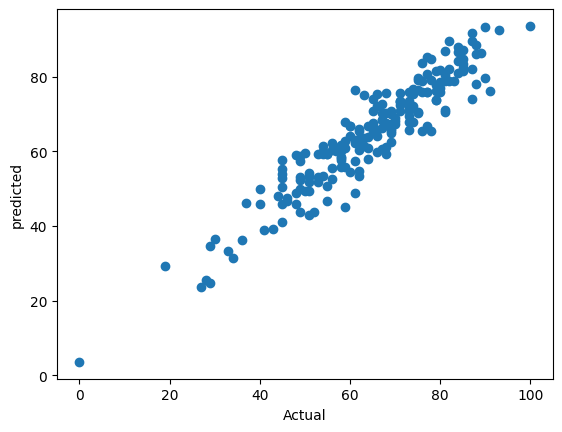

In [54]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")

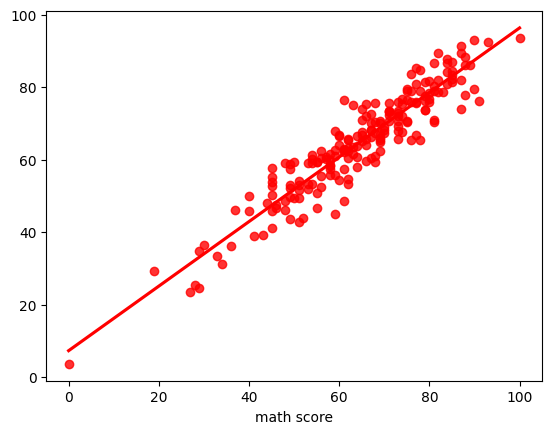

In [56]:
sns.regplot(x = y_test,y = y_pred,ci = None,color = 'red');

In [57]:
pred_df = pd.DataFrame({'pred_value':y_pred,'Actual_value':y_test,'difference':y_pred-y_test})
pred_df

,pred_value,Actual_value,difference
521,76.21875,91,-14.78125
737,59.21875,53,6.21875
740,76.90625,80,-3.09375
660,76.71875,74,2.71875
411,87.90625,84,3.90625
...,...,...,...
408,43.81250,52,-8.18750
332,62.40625,62,0.40625
208,67.75000,74,-6.25000
613,66.81250,65,1.81250
